<center><u><H1>Decision Trees</H1></u></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
%matplotlib inline

In [2]:
iris = load_iris()

## Preprocessing:

In [3]:
X = iris.data
y = iris.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=2019)

In [5]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

## Creating a model

In [6]:
dt = DecisionTreeClassifier()
dt.fit(X_train_std, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Predictions:

In [7]:
dt.predict(X_test_std[0, :].reshape(1, -1))

array([0])

In [8]:
dt.predict_proba(X_test_std[0, :].reshape(1, -1))

array([[1., 0., 0.]])

## Metrics:

In [9]:
y_pred = dt.predict(X_test_std)

In [10]:
print(f"Accuracy Score: {accuracy_score(y_test,y_pred)}")

Accuracy Score: 0.9555555555555556


In [11]:
print(f"Confusion Matrix\n{confusion_matrix(y_test, y_pred)}")

Confusion Matrix
[[19  0  0]
 [ 0  9  1]
 [ 0  1 15]]


In [12]:
print(f"Classification Report:\n{classification_report(y_test,y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.90      0.90      0.90        10
           2       0.94      0.94      0.94        16

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



## Cross Validation:

In [22]:
cross_val_score(dt, X, y, cv=10).mean()

0.9533333333333334

## Plotting Decision Boundaries:

In [20]:
def plot_regions(X, y, classifier):
    n_classes = len(np.unique(y))
    plot_colors = ["red","yellow","black"]
    res = 0.02

    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
        
        X = iris.data[:, pair]

        clf = classifier.fit(X, y)

        fig = plt.figure(1,figsize=(14, 10))
        plt.subplot(2, 3, pairidx + 1)

        x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
        y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, res), np.arange(y_min, y_max, res))
        
        output = clf.predict(np.array([xx.ravel(), yy.ravel()]).T)
        output = output.reshape(xx.shape)
        #plt.pcolormesh(xx,yy, output, cmap=plt.cm.cool)
        plt.contourf(xx, yy, output, alpha=0.8, cmap=plt.cm.cool)
        
        plt.xlabel(iris.feature_names[pair[0]])
        plt.ylabel(iris.feature_names[pair[1]])
        
        for c, color in zip(range(n_classes), plot_colors):
            plt.scatter(X[y==c, 0], X[y==c, 1], c=color, label=iris.target_names[c])
            plt.legend(loc='best')
          
    plt.suptitle("Decision Tree")

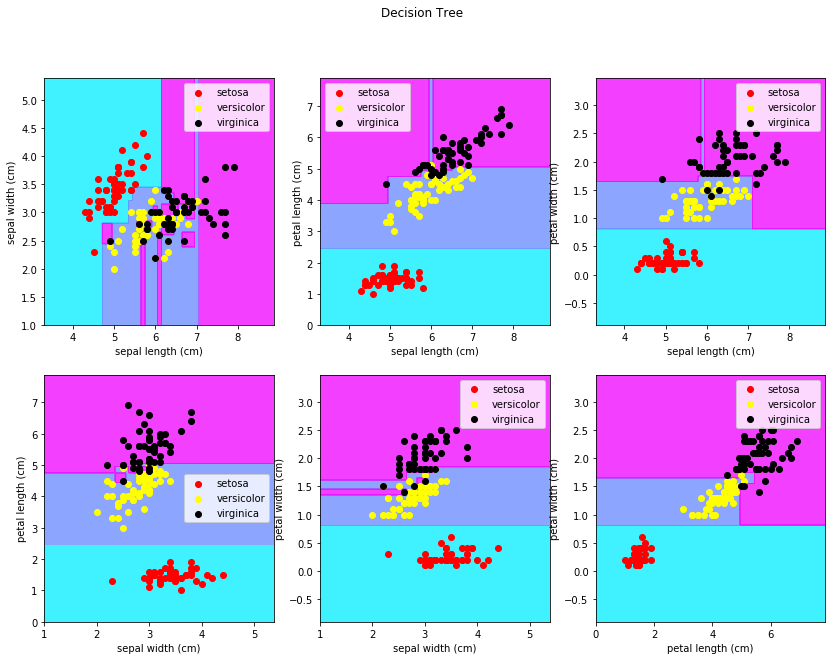

In [21]:
dt_ = DecisionTreeClassifier()
plot_regions(X=iris.data,y=iris.target,classifier=dt_)

## Reference: 

http://scikit-learn.org/stable/modules/tree.html

http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html